In [43]:
import numpy as np
import matplotlib.pyplot as plt
import apfelpy as ap
import lhapdf as lh

In [44]:
# Initalise LHAPDF set
f = lh.mkPDF("CT18NNLO")

Tabulating object... Time elapsed: 0.000078 seconds
Initializing DglapObjects for space-like QCD unpolarised evolution... Time elapsed: 0.165857 seconds
Tabulating object... Time elapsed: 0.130342 seconds
LHAPDF 6.5.3 loading /usr/local/Cellar/lhapdf/6.5.3/share/LHAPDF/CT18NNLO/CT18NNLO_0000.dat
CT18NNLO PDF set, member #0, version 1; LHAPDF ID = 14000


In [45]:
# Initalise APFEL++ according to the input LHAPDF set
# x-space grid
g = ap.Grid([ap.SubGrid(100,1e-5,3), ap.SubGrid(60,1e-1,3), ap.SubGrid(50,6e-1,3), ap.SubGrid(50,8e-1,3)])

# Initial scale
mu0 = np.sqrt(f.q2Min)

# Vectors of masses and thresholds
Masses = [0, 0, 0, f.quarkThreshold(4), f.quarkThreshold(5)]
Thresholds = [0, 0, 0, f.quarkThreshold(4), f.quarkThreshold(5)]

# Perturbative order
PerturbativeOrder = f.orderQCD

# Running coupling
a = ap.AlphaQCD(f.alphasQ(ap.constants.ZMass), ap.constants.ZMass, Thresholds, PerturbativeOrder)
Alphas = ap.TabulateObject(a, 100, 0.9, 1001, 3)

# Initialize QCD evolution objects
DglapObj = ap.initializers.InitializeDglapObjectsQCD(g, Masses, Thresholds)

# Construct the DGLAP objects
EvolvedPDFs = ap.builders.BuildDglap(DglapObj, lambda x, mu: ap.utilities.PhysToQCDEv(f.xfxQ(x, mu)), mu0, PerturbativeOrder, Alphas.Evaluate)

# Tabulate PDFs
TabulatedPDFs = ap.TabulateObjectSetD(EvolvedPDFs, 50, 1, 1000, 3)

In [46]:
# Test final scale in GeV
mu = 100

In [47]:
# Test strong coupling
print("Alpha(mu) LHAPDF:  ", f.alphasQ(mu))
print("Alpha(mu) APFEL++: ", Alphas.Evaluate(mu))

Alpha(mu) LHAPDF:   0.11637910209560516
Alpha(mu) APFEL++:  0.11637853924135232


In [48]:
# Now test PDF evolution
xb    = np.logspace(-5, 0, num = 1000)
xglh  = np.array([f.xfxQ(21, x, mu) for x in xb])
tpdfs = ap.utilities.QCDEvToPhys(TabulatedPDFs.Evaluate(mu).GetObjects())
xgap  = np.array([tpdfs[0].Evaluate(x) for x in xb])

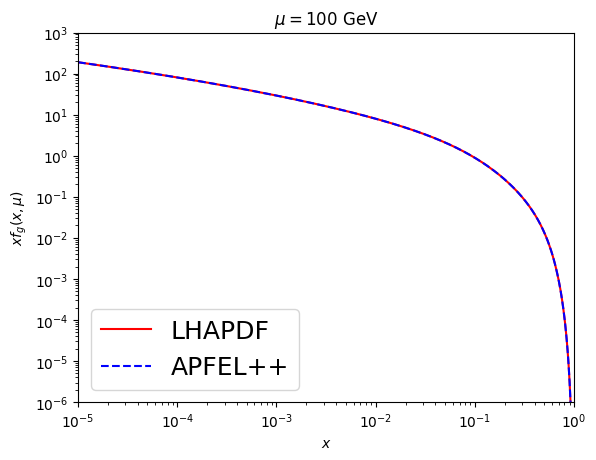

In [49]:
# Now test PDF evolution
plt.title(r"$\mu = " + str(mu) + "$ GeV")
plt.xlabel(r"$x$")
plt.ylabel(r"$xf_g(x,\mu)$")
plt.xlim(0.00001, 1)
plt.ylim(0.000001, 1000)
plt.xscale("log")
plt.yscale("log")
plt.plot(xb, xglh, c = "red",  linestyle = "-", lw = 1.5, label = r"LHAPDF")
plt.plot(xb, xgap, c = "blue", linestyle = "--", label = r"APFEL++")
plt.legend(fontsize = 18)

plt.show()
plt.close()

In [50]:
# Now test PDF evolution
x     = 0.1
muv   = np.logspace(0.16, 2, num = 500)
xglh  = np.array([f.xfxQ(5, x, mu) for mu in muv])
xgap  = np.array([ap.utilities.QCDEvToPhys(TabulatedPDFs.Evaluate(mu).GetObjects())[5].Evaluate(x) for mu in muv])

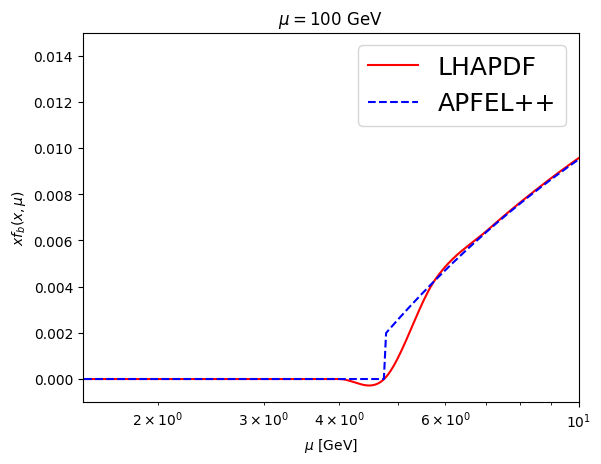

In [51]:
# Now test PDF evolution
plt.title(r"$\mu = " + str(mu) + "$ GeV")
plt.xlabel(r"$\mu$ [GeV]")
plt.ylabel(r"$xf_b(x,\mu)$")
plt.xlim(1.5, 10)
plt.ylim(-0.001, 0.015)
plt.xscale("log")
#plt.yscale("log")
plt.plot(muv, xglh, c = "red",  linestyle = "-", lw = 1.5, label = r"LHAPDF")
plt.plot(muv, xgap, c = "blue", linestyle = "--", label = r"APFEL++")
plt.legend(fontsize = 18)

plt.show()
plt.close()